# TASK1
The classic Olivetti faces dataset contains 400 grayscale 64×64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?

In [1]:
from sklearn.datasets import olivetti_faces

faces = olivetti_faces.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/paulmospan/scikit_learn_data


In [4]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [11]:
X = faces.data
X.shape

(400, 4096)

In [12]:
y = faces.target
y.shape

(400,)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, 
                                                                 test_size=0.2, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, 
                                                                 test_size=0.2, stratify=y_train)

In [21]:
X_train.shape, y_train.shape

((256, 4096), (256,))

In [22]:
X_val.shape, y_val.shape

((64, 4096), (64,))

In [23]:
X_test.shape, y_test.shape

((80, 4096), (80,))

### Using PCA to speed things up

In [25]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

pca.n_components_

188

In [26]:
X_train_pca.shape, X_val_pca.shape, X_test_pca.shape

((256, 188), (64, 188), (80, 188))

#### Clustering the images using K-Means

In [28]:
from sklearn.cluster import KMeans

k_range = range(10, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

/Users/paulmospan/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


In [35]:
kmeans_per_k

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=25, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='a

In [32]:
len(kmeans_per_k)

28

In [34]:
kmeans_per_k[0].labels_

array([3, 7, 6, 4, 8, 2, 3, 9, 5, 1, 4, 2, 6, 7, 5, 7, 8, 9, 9, 0, 0, 1,
       6, 9, 2, 8, 0, 1, 4, 3, 0, 7, 9, 4, 6, 2, 1, 2, 6, 5, 3, 3, 8, 2,
       8, 9, 7, 2, 8, 7, 9, 0, 9, 7, 9, 0, 4, 3, 2, 2, 3, 8, 7, 6, 9, 3,
       3, 2, 2, 7, 9, 7, 7, 8, 9, 7, 0, 2, 4, 4, 7, 4, 7, 3, 2, 8, 3, 9,
       8, 4, 4, 9, 5, 3, 3, 0, 9, 2, 8, 1, 3, 8, 4, 0, 7, 9, 6, 9, 2, 5,
       9, 9, 2, 9, 0, 8, 5, 2, 7, 1, 9, 8, 1, 8, 1, 7, 3, 8, 4, 2, 3, 1,
       3, 2, 5, 1, 7, 0, 4, 6, 4, 7, 0, 2, 4, 8, 8, 9, 7, 8, 7, 8, 7, 7,
       6, 6, 2, 3, 0, 9, 3, 9, 1, 3, 8, 8, 1, 7, 3, 8, 8, 7, 9, 7, 4, 0,
       0, 8, 1, 9, 7, 2, 9, 8, 9, 2, 5, 6, 8, 9, 3, 0, 8, 6, 7, 8, 7, 7,
       5, 9, 9, 8, 7, 8, 9, 0, 9, 7, 4, 2, 7, 7, 6, 9, 4, 6, 2, 8, 9, 4,
       3, 0, 0, 7, 2, 1, 2, 2, 4, 5, 9, 9, 8, 4, 3, 1, 3, 9, 1, 0, 7, 2,
       8, 7, 9, 7, 4, 1, 7, 2, 8, 6, 3, 0, 8, 0], dtype=int32)

In [36]:
len(kmeans_per_k[0].labels_)

256

#### Suing Silhouette score to ensure that I have a good number of clusters

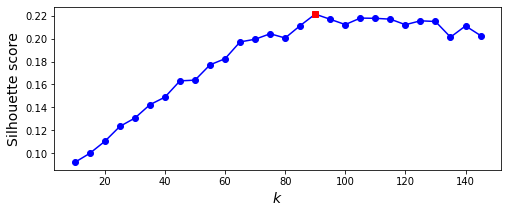

In [30]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

#### best_k = number of clusters

In [37]:
best_k

90

#### Inertia diagram to make sure 90 is the right number of clusters

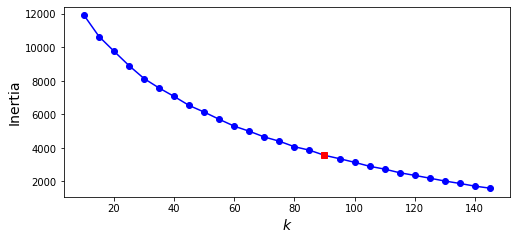

In [39]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

#### The optimal number of clusters is not clear on this inertia diagram, as there is no obvious elbow, so let's stick with k=90.

In [40]:
best_model = kmeans_per_k[best_index]

### Visualizing clusters

Cluster 0


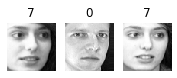

Cluster 1


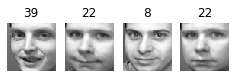

Cluster 2


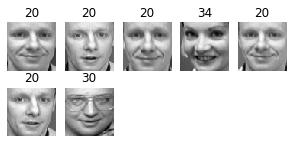

Cluster 3


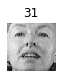

Cluster 4


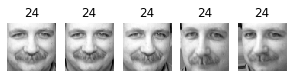

Cluster 5


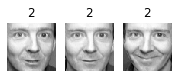

Cluster 6


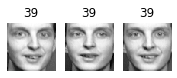

Cluster 7


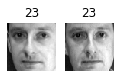

Cluster 8


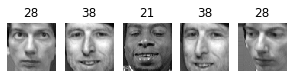

Cluster 9


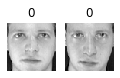

Cluster 10


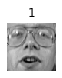

Cluster 11


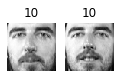

Cluster 12


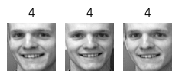

Cluster 13


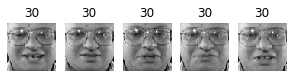

Cluster 14


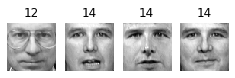

Cluster 15


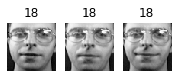

Cluster 16


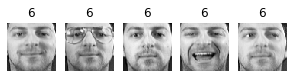

Cluster 17


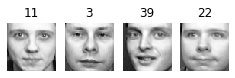

Cluster 18


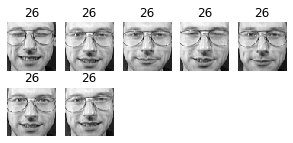

Cluster 19


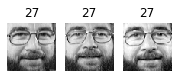

Cluster 20


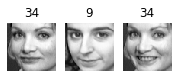

Cluster 21


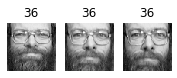

Cluster 22


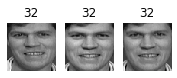

Cluster 23


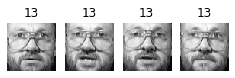

Cluster 24


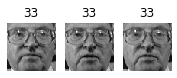

Cluster 25


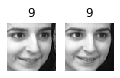

Cluster 26


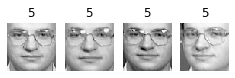

Cluster 27


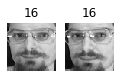

Cluster 28


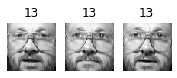

Cluster 29


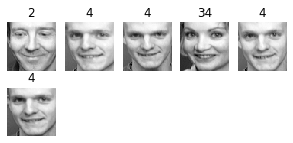

Cluster 30


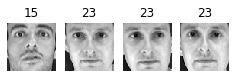

Cluster 31


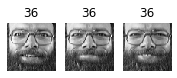

Cluster 32


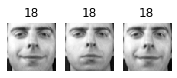

Cluster 33


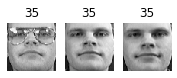

Cluster 34


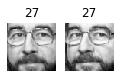

Cluster 35


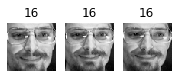

Cluster 36


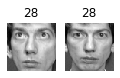

Cluster 37


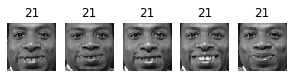

Cluster 38


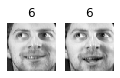

Cluster 39


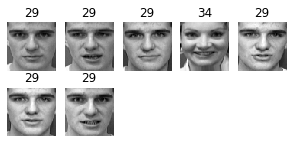

Cluster 40


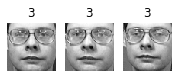

Cluster 41


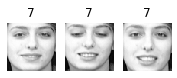

Cluster 42


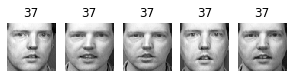

Cluster 43


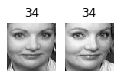

Cluster 44


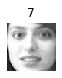

Cluster 45


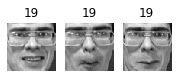

Cluster 46


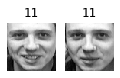

Cluster 47


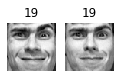

Cluster 48


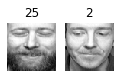

Cluster 49


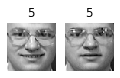

Cluster 50


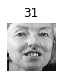

Cluster 51


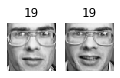

Cluster 52


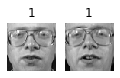

Cluster 53


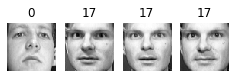

Cluster 54


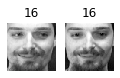

Cluster 55


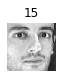

Cluster 56


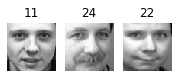

Cluster 57


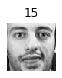

Cluster 58


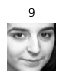

Cluster 59


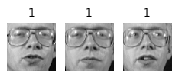

Cluster 60


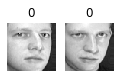

Cluster 61


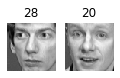

Cluster 62


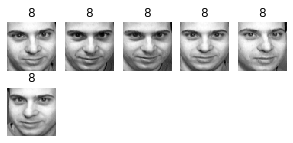

Cluster 63


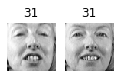

Cluster 64


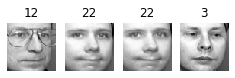

Cluster 65


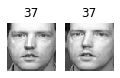

Cluster 66


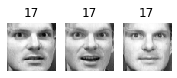

Cluster 67


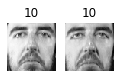

Cluster 68


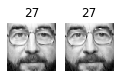

Cluster 69


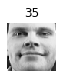

Cluster 70


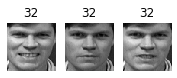

Cluster 71


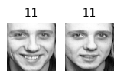

Cluster 72


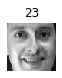

Cluster 73


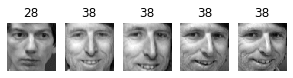

Cluster 74


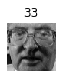

Cluster 75


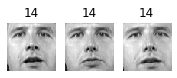

Cluster 76


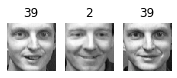

Cluster 77


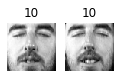

Cluster 78


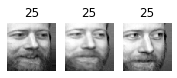

Cluster 79


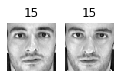

Cluster 80


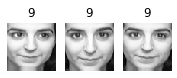

Cluster 81


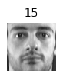

Cluster 82


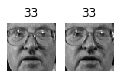

Cluster 83


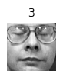

Cluster 84


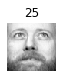

Cluster 85


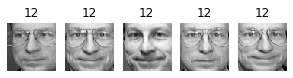

Cluster 86


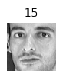

Cluster 87


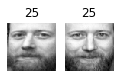

Cluster 88


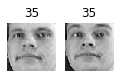

Cluster 89


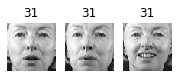

In [42]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

# TASK 2:
Continuing with the Olivetti faces dataset,train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.


#### Training a classifier to predict which person is represented in each picture, and evaluating it on the validation set.

In [44]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_val_pca, y_val)

0.921875